# Solución correspondiente a dos hemisferios a potenciales opuestos


Aquí resolveremos numéricamente el problema de una cáscara con sus hemisferios a potenciales opuestos. La solución analítica se la puede encontrar, por ejemplo en: http://www.famaf.unc.edu.ar/~reula/Docencia/Electromagnetismo/electrodynamics.pdf, página 81.

Debido a la simetría axial solución se puede expresar como suma de polinomios de Legendre $P_n(x)$, donde $x=cos(\theta)$ y potencias de r, la coordenada radial.

$$
\phi(x,r) = \sum_{n=0}^{\infty} A_n r^{-(n+1)}P_n(x)
$$

Supondremos la cáscara tiene radio a y reescalaremos la variable radia como $r\to \frac{r}{a}$ de esa manera queda adimensional y la cáscara a radio unidad.

Debemos calcular ahora los coeficientes $A_n$. Notemos que $A_{n2}=0 \;\;\; \forall n$ ya que 
la cáscara tiene simetría impar ante cambios $x \to -x$ y por lo tanto ninguno de los polinomios pares puede contribuir.

Los impares se calculan imponiendo la condición de contorno: 
$$
\phi(x,1) = V_0 \theta(x)
$$
donde $\theta$ es la función escalón. Tomaremos $V_0=1$ en lo que sigue. Siempre se puede reescalear la solución al final.

Tenemos así que (recordando que la cáscara está a $r=1$),

$$
\theta(x) = \sum_{n=0}^{\infty} A_n P_n(x),
$$
$
multiplicando por $P_{m}(x)$ ambos lados e integrando en $[-1,1]$ obtenemos, 

$$
\int_{-1}^{1} P_n(x) \theta(x) dx = \frac{2}{2n+1} A_n,
$$
o, 

$$
A_n = (2n+1) \int_0^1 P_n(x)dx \;\;\; n \; \mbox{impar}.
$$

Haremos estos cálculos analíticamente y luego graficaremos la solución.

Primero definimos todo lo necesario de las librerías de Python.

In [19]:
%matplotlib inline
#%matplotlib notebook
#from __future__ import division
from sympy import *
from sympy import legendre
from numpy import *
#from sympy.plotting import plot
import matplotlib.pyplot as mpl
#import matplotlib as mpl
#import matplotlib as mpl
#import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation, rc
from IPython.display import HTML
#init_printing(use_unicode=True)
x, y, z = symbols('x y z')
k, m, n = symbols('k m n', integer=True)
f, step, potential = symbols('f step potential', cls=Function)
#var('n m x')

Luego probamos que las definiciones funcionan correctamente con algunos ejemplos:

In [20]:
legendre(3,x)

5*x**3/2 - 3*x/2

In [21]:
Integral(legendre(3,x),(x,0,1)).doit()

-1/8

Calculamos los coeficientes (solo para los n impares, n=2m+1).

In [22]:
A=lambda m: (2*(2*m+1)+1)*Integral(legendre(2*m+1,x),(x,0,1))

In [23]:
A(m)

(4*m + 3)*Integral(legendre(2*m + 1, x), (x, 0, 1))

Chequeamos que la condición de contorno se satisfaga. Para ello sumamos los 20 primeros términos de la suma. (Vea que sucede si toma más términos).

In [24]:
step=lambdify(x,Sum(A(m).doit()*legendre(2*m+1,x),(m,0,20)).doit(),"numpy")

Graficamos la aproximación a la función escalón que calculamos:

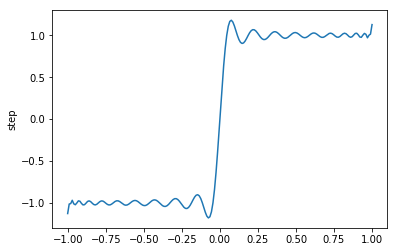

In [25]:
x_vals = linspace(-1, 1, 200)
z_vals = step(x_vals)
mpl.plot(x_vals, z_vals)
mpl.ylabel("step")
mpl.show()

Ahora calculamos una aproximación a la solución completa, también tomando 20 términos de la serie.

In [26]:
potential=lambdify((x,y),Sum(A(m).doit()*legendre(2*m+1,x)*y**(-2*(m+1)),(m,0,20)).doit(),"numpy")

Finalmente la graficamos:

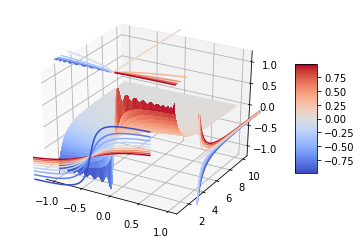

In [28]:
y_vals = linspace(1,10,200)
X,Y = meshgrid(x_vals,y_vals)
z_vals = potential(X,Y)
fig = mpl.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(-1.2, 1.2)
surf = ax.plot_surface(X,Y,z_vals, rstride=2, alpha=0.9, cstride=2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
levels = arange(-1., 1., 0.2)
levels_y = arange(0.9, 2., 0.1)
cset = ax.contour(X, Y, z_vals, levels, zdir='z', offset=1.5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels, zdir='x', offset=1.4, cmap=cm.coolwarm)
cset = ax.contour(X, Y, z_vals, levels_y, zdir='y', offset=-2, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
mpl.show()